# Seaborn tutorial

Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.



- Making attractive statistical plots.
- Easily and flexibly displaying distributions.
- Examining relationships between multiple variables
- Convenient views onto the overall structure of complex datasets

# Installing

pip install seaborn



# Visualizing the distribution of a dataset


In [2]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
sns.set(color_codes=True)


## Plotting univariate distributions


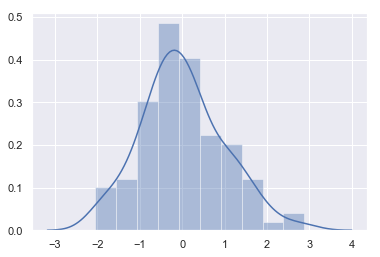

In [3]:
x = np.random.normal(size=100)
sns.distplot(x);

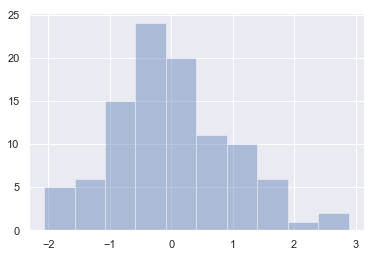

In [4]:
sns.distplot(x, kde=False);


## Plotting bivariate distributions



In [5]:
iris = sns.load_dataset("iris")
    
    

In [6]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Scatterplot

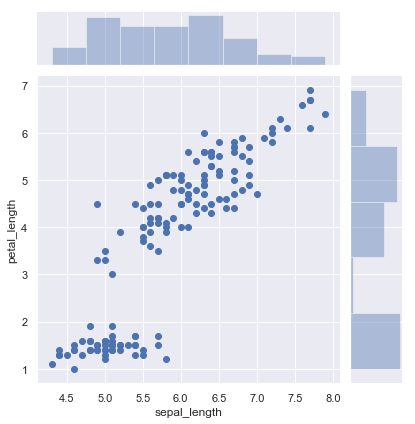

In [7]:
sns.jointplot(x="sepal_length", y="petal_length", data=iris)

## Hexbin plots

The bivariate analogue of a histogram is known as a “hexbin” plot, because it shows the counts of observations that fall within hexagonal bins. This plot works best with relatively large datasets

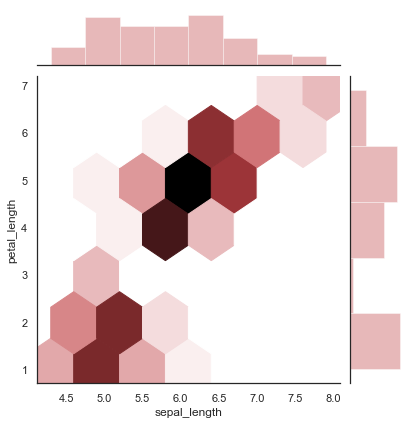

In [12]:
with sns.axes_style("white"):
    sns.jointplot(x="sepal_length", y="petal_length", kind="hex",color = 'r' ,data=iris)

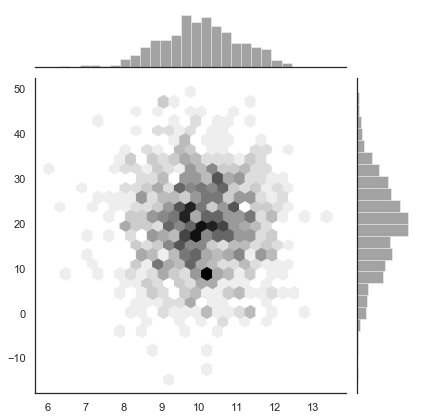

In [24]:
mean = [10, 20]
cov = [[1,0], [0,100]]
x, y = np.random.multivariate_normal(mean, cov, 1000).T
#df = pd.DataFrame(data={'x':x, 'y':y})
with sns.axes_style("white"):
    sns.jointplot(x=x, y=y, kind="hex", color="k");

## Kernel density estimation


It is also possible to use the kernel density estimation  to visualize a bivariate distribution. In seaborn, this kind of plot is shown with a contour plot and is available as a style in jointplot()

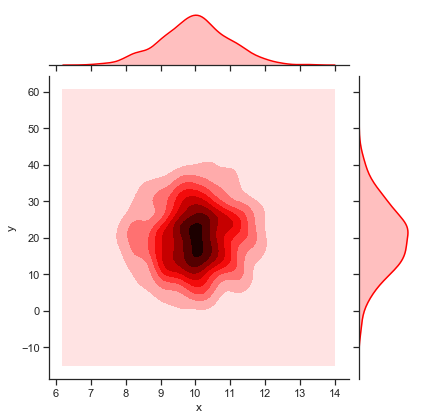

In [25]:
sns.jointplot(x='x', y='y',data=df, kind="kde", shade=True,color='red')


### Tweaking

jointplot() returns the JointGrid object after plotting, which you can use to add more layers or to tweak other aspects of the visualization:

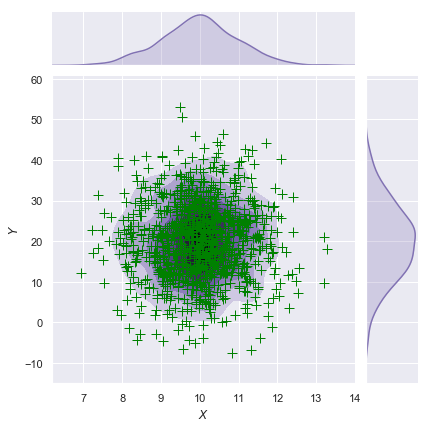

In [20]:
g = sns.jointplot(x='x', y="y", data=df, kind="kde", color="m")
g.plot_joint(plt.scatter, c="green", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$X$", "$Y$");


## Visualizing pairwise relationships in a dataset


In [21]:
sns.set(style="ticks", color_codes=True)

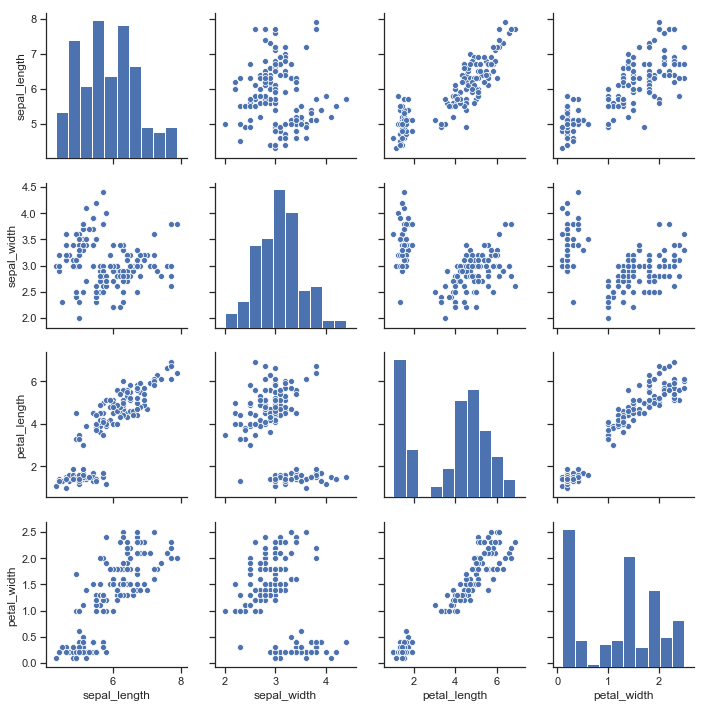

In [22]:
sns.pairplot(iris)

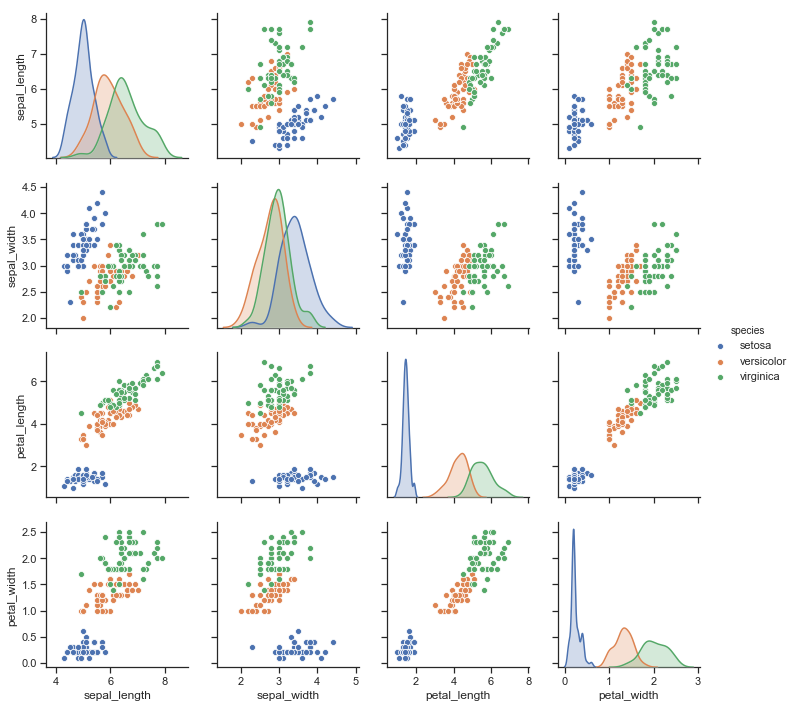

In [23]:
sns.pairplot(iris, hue='species')

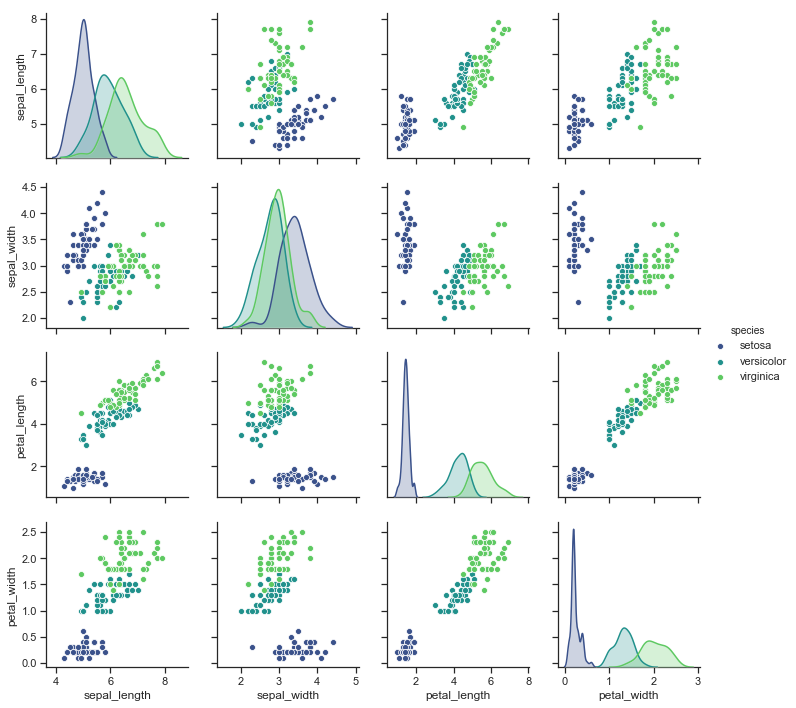

In [28]:
sns.pairplot(iris, hue="species", palette="viridis")

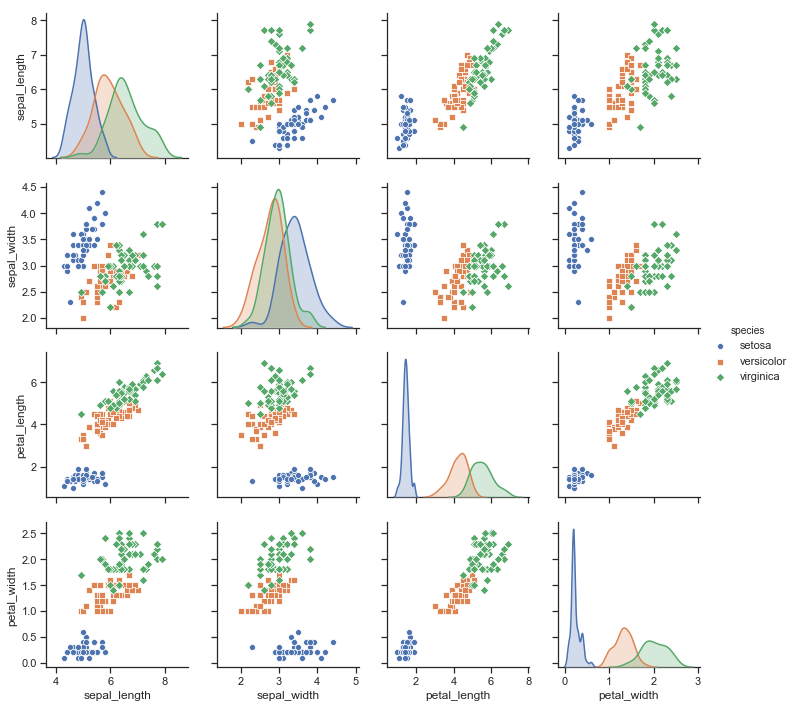

In [29]:
sns.pairplot(iris, hue="species", markers=["o", "s", "D"])


density estimates for univariate plots:

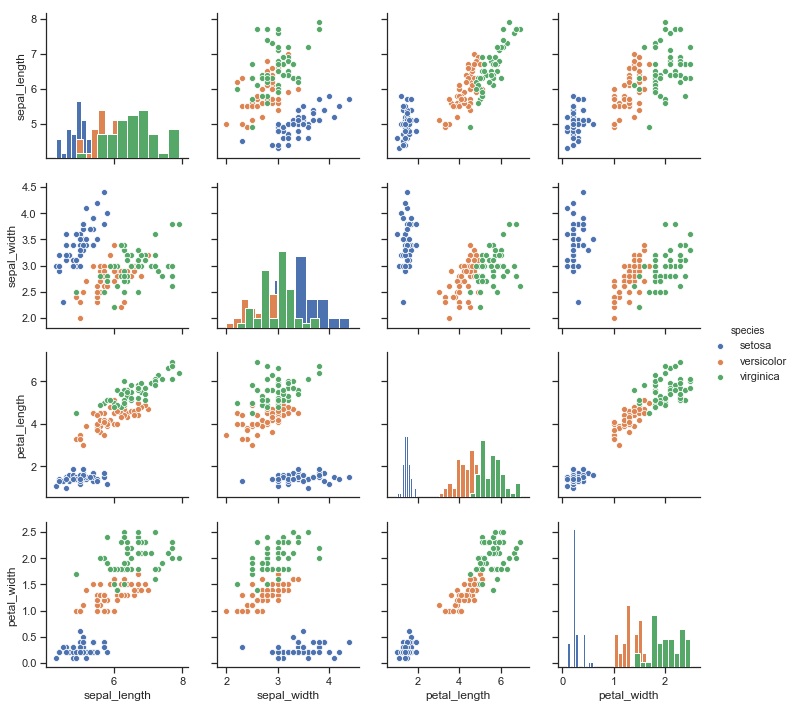

In [32]:
sns.pairplot(iris, diag_kind="hist", hue='species')

## Scatter plots

In [33]:
tips = sns.load_dataset("tips")


In [34]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


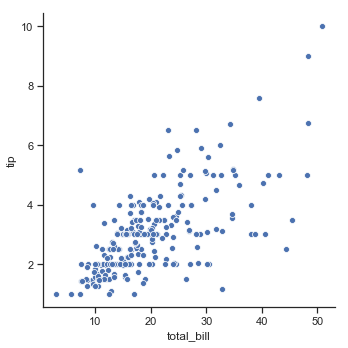

In [35]:
sns.relplot(x="total_bill", y="tip", data=tips)

### Showing multiple relationships

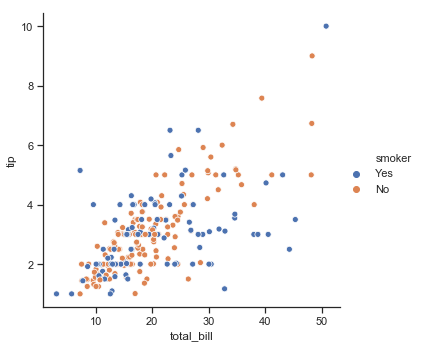

In [36]:
sns.relplot(x="total_bill", y="tip", hue="smoker", data=tips)

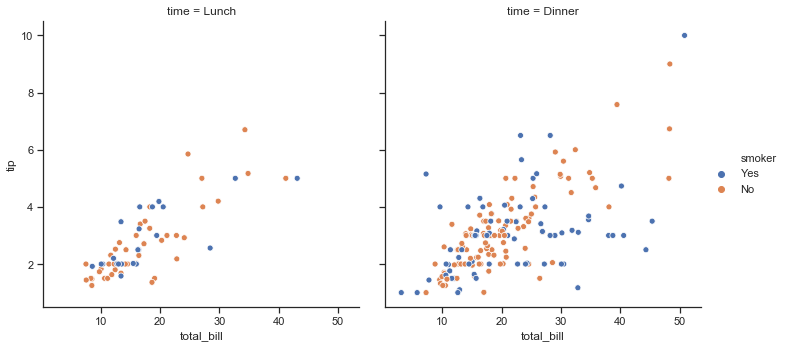

In [37]:
sns.relplot(x="total_bill", y="tip", hue="smoker",
            col="time", data=tips)

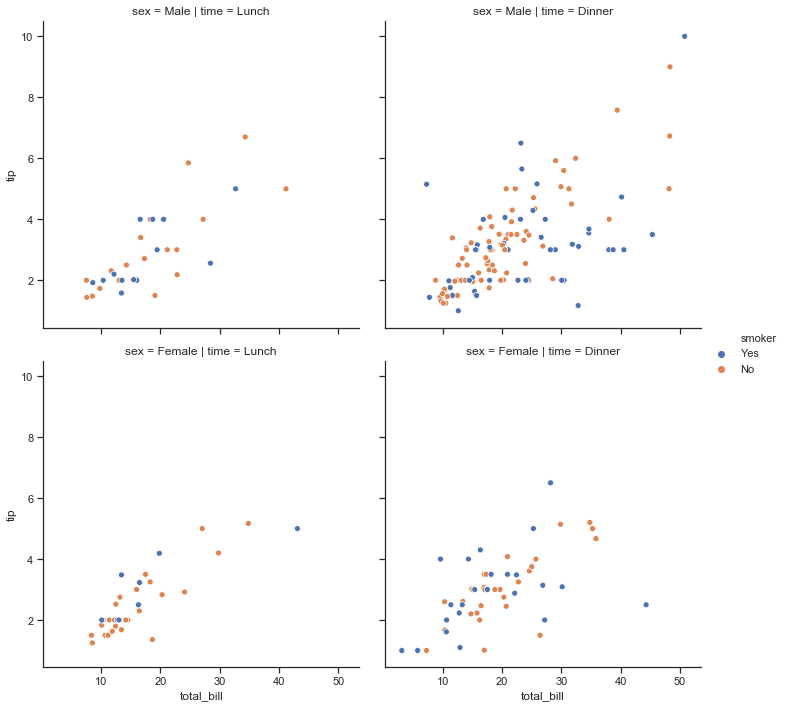

In [38]:
sns.relplot(x="total_bill", y="tip", hue="smoker",
            col="time",row='sex' ,data=tips)

## Line plots

In [39]:
fmri = sns.load_dataset("fmri")


In [40]:
fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


The default behavior in seaborn is to aggregate the multiple measurements at each x value by plotting the mean and the 95% confidence interval around the mean:

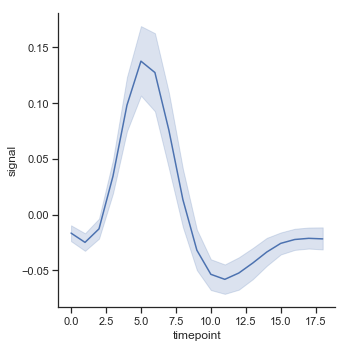

In [41]:
sns.relplot(x="timepoint", y="signal", kind="line", data=fmri);


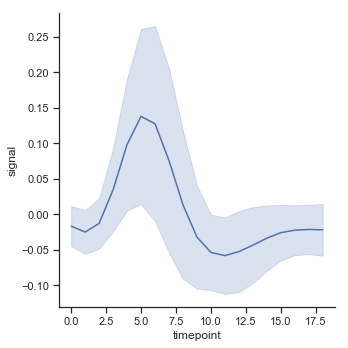

In [42]:
sns.relplot(x="timepoint", y="signal", kind="line", ci="sd", data=fmri);


## Plotting subsets of data 


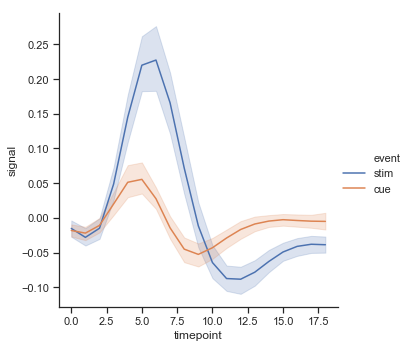

In [43]:
sns.relplot(x="timepoint", y="signal", hue="event", kind="line", data=fmri);


Adding a style semantic to a line plot

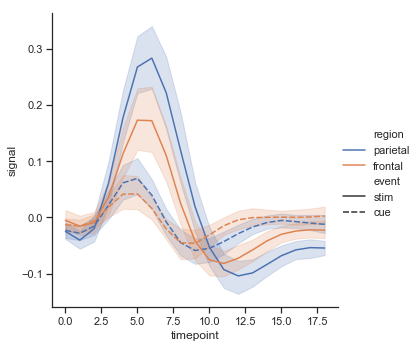

In [44]:
sns.relplot(x="timepoint", y="signal", hue="region", style="event",
            kind="line", data=fmri)

In [ ]:
## you can also plot each sampling unit separately

ValueError: expr must be a string to be evaluated, <class 'pandas.core.series.Series'> given

### Showing multiple relationships

You can also show the influence two variables this way: one by faceting on the columns and one by faceting on the rows.

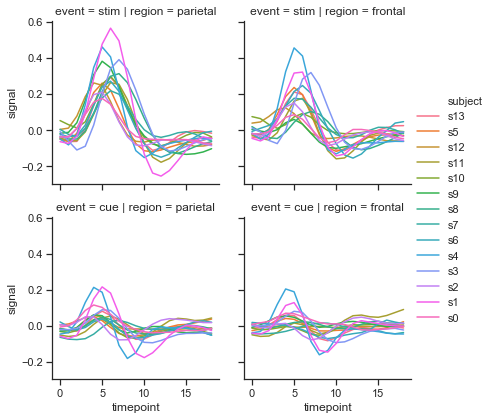

In [48]:
sns.relplot(x="timepoint", y="signal", hue="subject",
            col="region", row="event", height=3,
            kind="line", estimator=None, data=fmri)

Look at effects across many levels of a variable

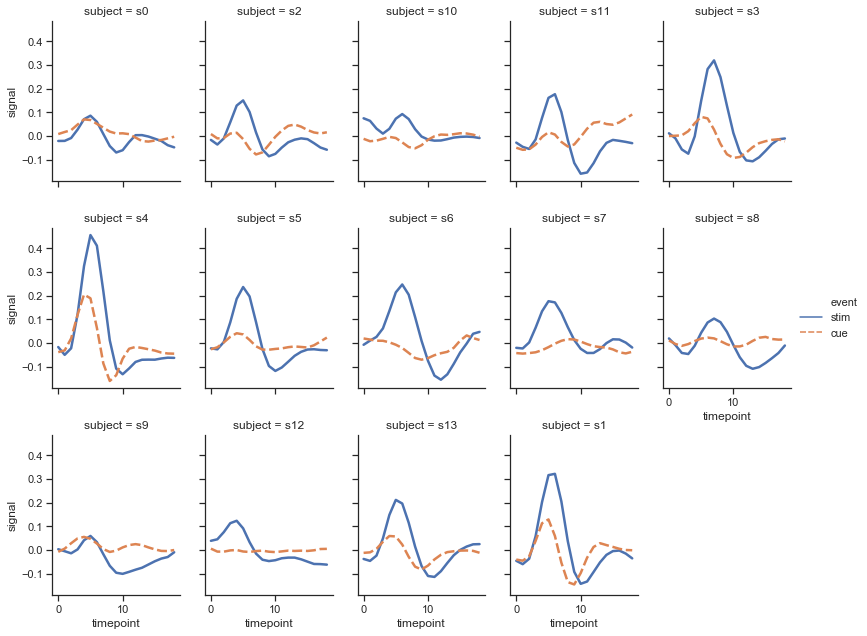

In [49]:
sns.relplot(x="timepoint", y="signal", hue="event", style="event",
            col="subject", col_wrap=5,
            height=3, aspect=.75, linewidth=2.5,
            kind="line", data=fmri.query("region == 'frontal'"));

## Categorical data


### Categorical scatterplots

In [50]:
tips = sns.load_dataset("tips")


In [51]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


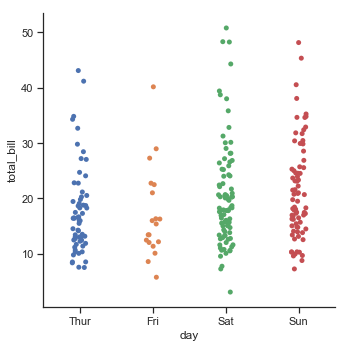

In [52]:
sns.catplot(x="day", y="total_bill", data=tips)

The jitter parameter controls the magnitude of jitter or disables it altogether:



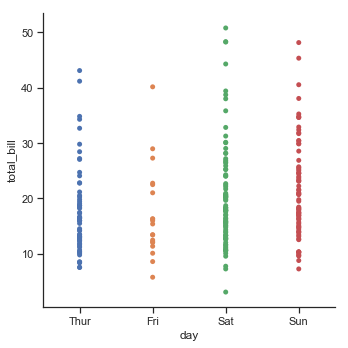

In [53]:
sns.catplot(x="day", y="total_bill", jitter=False, data=tips)


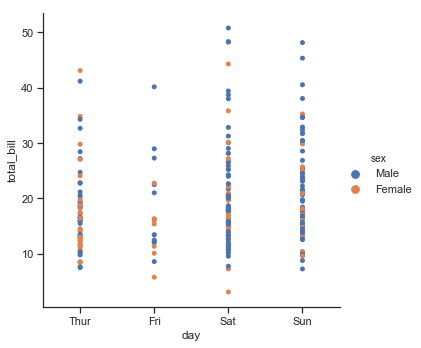

In [55]:
sns.catplot(x="day", y="total_bill", hue="sex", data=tips, jitter=False)


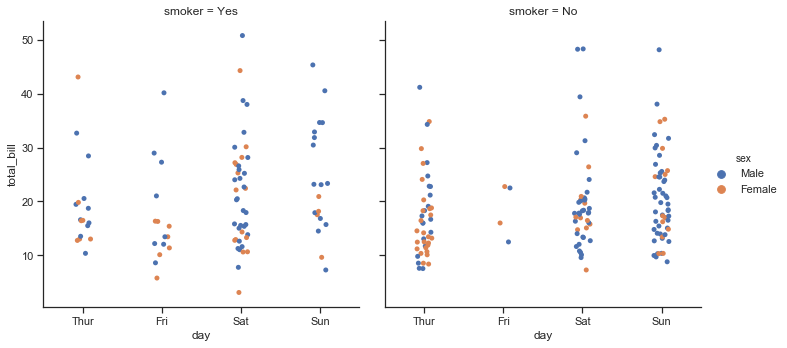

In [56]:
sns.catplot(x="day", y="total_bill", hue="sex",col = 'smoker', data=tips)


### Boxplots


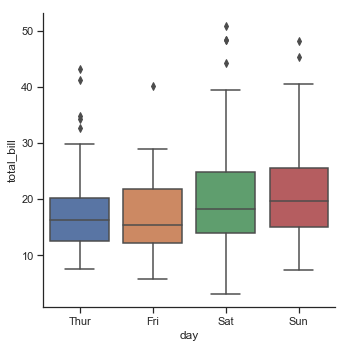

In [57]:
sns.catplot(x="day", y="total_bill", kind="box", data=tips);


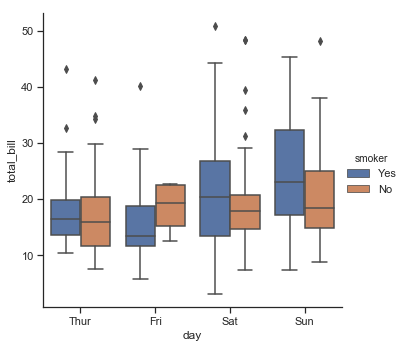

In [58]:
sns.catplot(x="day", y="total_bill", hue="smoker", kind="box", data=tips);


### Violinplots

combines a boxplot with the kernel density estimation

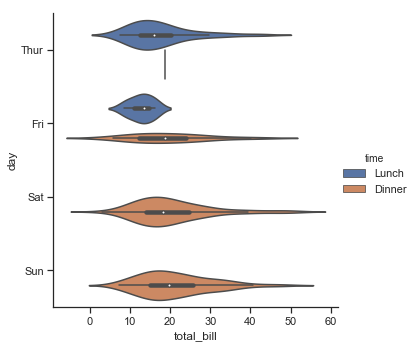

In [59]:
sns.catplot(x="total_bill", y="day", hue="time",
            kind="violin", data=tips)

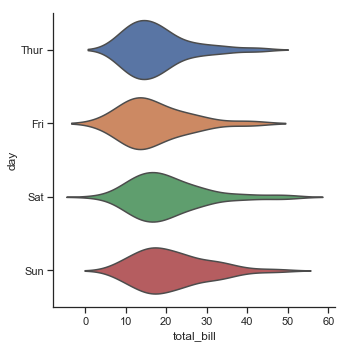

In [65]:
g = sns.catplot(y="day", x="total_bill", kind="violin", inner=None, data=tips)


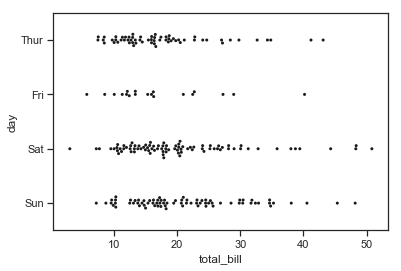

In [66]:
sns.swarmplot(y="day", x="total_bill", color="k", size=3, data=tips)